## Lineare Regression mit Python

Laden der benötigten Pakete

In [2]:
#import matplotlib.pyplot as plt # for plotting
import numpy as np   # Basic numerics

#### Beispiel:
Wir nehmen an, dass wir den Druck $p$ eines idealen Gases in einem festen Behälter (Volumen $V$) in abhängigkeit der Temperatur $t$ (in Celsius) gemessen haben. Nach dem idealen Gasgesetz ($pV=nR(t+t_0$) sollte hier ein linearer Zusammenhang bestehen, aus dem wir den absoluten Nullpunkt $t_0$ (in Celsius) bestimmen können, sofern $V, n, R$ bekannt sind:
$$p(t) = \frac{nR}{V}(t +  t_0)$$
oder
$ p(t) = at+b$, mit $a=\frac{nR}{V}$ und $b = \frac{nR}{V}t_0$


In [3]:
t = np.linspace(-20,100,10)
p = 2.1*(t + np.random.normal(273,5,10))

Grafik der Daten

<function matplotlib.pyplot.show(*args, **kw)>

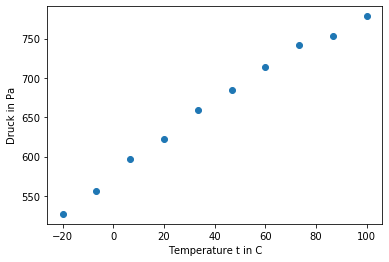

In [7]:
import matplotlib.pyplot as plt # for plotting
plt.plot(t,p,'o')
plt.xlabel('Temperature t in C')
plt.ylabel('Druck in Pa')
plt.show

In [5]:
# unfortunately linregress in the stats package does not provide
# the standard deviation (error) of the intercept
from scipy.stats import linregress
a, b, r, P, err_a= linregress(t,p)
print("Steigung a = ", a, ", Achsenabschnitt b = ", b, ", Fehler der Steigung a = ",err_a)

Steigung a =  2.1177920531164838 , Achsenabschnitt b =  578.5743154058588 , Fehler der Steigung a =  0.07545852730761497


In [6]:
from scipy.optimize import curve_fit

In [8]:
def linear_f(x,a,b):
    '''x: independent variable
       a: slope
       b: intersect '''
    return a*x+b

In [9]:
p_opt, p_cov = curve_fit(linear_f,t,p)  # finds best parameter a, b and there covariance
# Returns:
#     optimal parameters in p_opt
#     covariance matrix of these parameters in p_cov
print("p_opt = ",p_opt)
print("p_cov = ",p_cov)

p_opt =  [  2.11779205 578.5743154 ]
p_cov =  [[ 5.69398931e-03 -2.27759576e-01]
 [-2.27759576e-01  1.74615675e+01]]


In [10]:
p

array([527.10660805, 556.42574285, 597.23464235, 622.18851994,
       659.07184737, 684.27559498, 713.2521171 , 742.04320911,
       752.85521286, 778.4064807 ])

In [11]:
a = p_opt[0] # slope
Da = np.sqrt(p_cov[0,0]) # std slope (error)
b = p_opt[1] #  intercept
Db = np.sqrt(p_cov[1,1])

In [12]:
print("Steigung a = {:5.2f} +/- {:5.2}".format(a,Da))
print("Achsenabschnitt b = {:5.2f} +/- {:5.2}".format(b, Db))

Steigung a =  2.12 +/- 0.075
Achsenabschnitt b = 578.57 +/-   4.2


In [13]:
p

array([527.10660805, 556.42574285, 597.23464235, 622.18851994,
       659.07184737, 684.27559498, 713.2521171 , 742.04320911,
       752.85521286, 778.4064807 ])

<function matplotlib.pyplot.show(*args, **kw)>

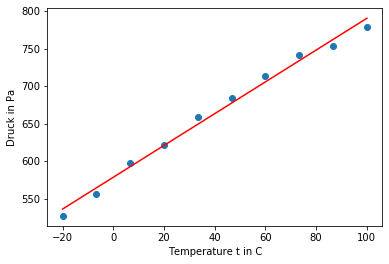

In [14]:
plt.plot(t,p,'o')
plt.plot(t, a*t+b,'r')
plt.xlabel('Temperature t in C')
plt.ylabel('Druck in Pa')
plt.show